## How does book length effect average ratings?
#### By genre? word count vs page count different?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

books_df = pd.read_csv('books_genre.csv')

In [2]:
# data exploration
books_df.info()
books_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             11127 non-null  int64  
 1   Title               11127 non-null  object 
 2   Author              11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  genres              11030 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


#### Clean data

In [3]:
# print null values for each column
print(books_df.isnull().sum())

Book Id                0
Title                  0
Author                 0
average_rating         0
isbn                   0
isbn13                 0
language_code          0
num_pages              0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
genres                97
dtype: int64


In [3]:
# remove books where genre is null
books_df = books_df.dropna(subset=['genres'])

In [5]:
print(books_df.isnull().sum())

Book Id               0
Title                 0
Author                0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
genres                0
dtype: int64


In [6]:
# How many books are not rated? (average_rating is 0.0)
books_df[books_df['average_rating'] == 0.0].shape[0]


15

In [4]:
# remove books rated as 0.0
books_df = books_df[books_df['average_rating'] > 0.0]
books_df[books_df['average_rating'] == 0.0].shape[0]

0

In [8]:
# How many duplicate book titles are there?
print(books_df.Title.duplicated().sum())

773


In [5]:
# remove duplicates based on title and authors
books_df.drop_duplicates(subset='Title', keep='first', inplace=True)
print(books_df.Title.duplicated().sum())

0


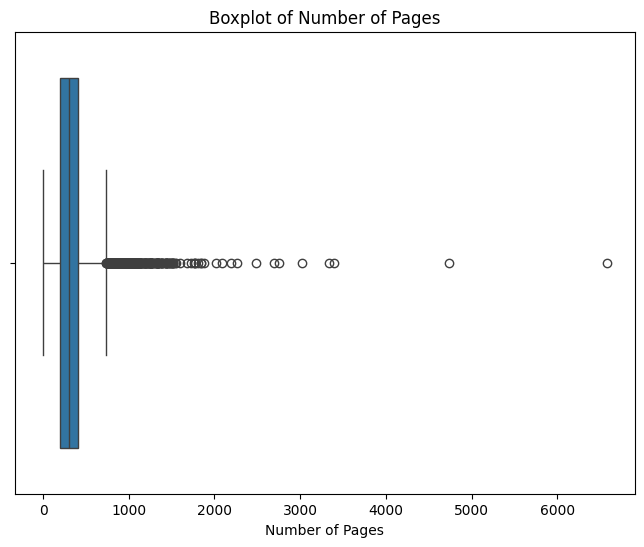

In [10]:
# boxplot of num_pages to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=books_df['num_pages'])
plt.title('Boxplot of Number of Pages')
plt.xlabel('Number of Pages')
plt.show()

In [6]:
# create new dataframe for books greater than 1000 pages
long_books = books_df[books_df['num_pages'] > 1500]

# print the tile and page number of these books
for index, row in long_books.iterrows():
    print(f"{row['Title']}: {row['num_pages']} pages")

Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5): 2690 pages
Harry Potter Collection (Harry Potter  #1-6): 3342 pages
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings: 1728 pages
The Iliad/The Odyssey: 1556 pages
The Complete Pelican Shakespeare: 1808 pages
The History of the Lord of the Rings (The History of Middle-earth #6-9): 1680 pages
The Complete Anne of Green Gables Boxed Set (Anne of Green Gables  #1-8): 2088 pages
The New Annotated Sherlock Holmes: The Complete Short Stories: 1878 pages
Plato: Complete Works: 1838 pages
Rabbit Angstrom: The Four Novels: 1520 pages
The Lord of the Rings / The Hobbit: 1600 pages
The Collected Letters of C.S. Lewis  Volume 3: Narnia  Cambridge  and Joy  1950 - 1963: 1840 pages
The Norton Anthology of Short Fiction: 1776 pages
The Complete Works: The Revised Oxford Translation  Vol. 1: 1757 pages
Literary Criticism  Vol. 1: Essays on Literature / American Writers / English Writers: 1504 pages
Study Bible: NIV: 2198 pages

In [7]:
# since most books over 1500 pages are collections or encyclopedias, we will remove them
books_df = books_df[books_df['num_pages'] <= 1500]

In [8]:
books_df.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10214.000000,10214.000000,1.021400e+04,10214.000000,1.021400e+04,10214.000000
mean,21390.153613,3.941608,9.761673e+12,329.497650,1.736014e+04,535.330625
std,13077.694571,0.293439,4.235895e+11,207.241815,1.082649e+05,2516.081141
min,1.000000,2.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10416.250000,3.770000,9.780345e+12,195.000000,1.140000e+02,9.000000
50%,20651.500000,3.960000,9.780575e+12,296.500000,8.300000e+02,49.000000
75%,32101.250000,4.140000,9.780872e+12,409.750000,5.422750e+03,249.000000
max,45641.000000,5.000000,9.790008e+12,1500.000000,4.597666e+06,94265.000000


In [9]:
sep_genres = books_df["genres"]=books_df["genres"].apply(lambda x: ';'.join( x.split(';')[:4] ).split(",")[0] )

# Find the largest number of genres for a book?
max_genres = sep_genres.apply(lambda x: len(x.split(';'))).max()

genres_df = books_df.copy()
# Split genres into separate columns and save into new df
for i in range(max_genres):
    genres_df[f'genre_{i+1}'] = sep_genres.apply(lambda x: x.split(';')[i] if len(x.split(';')) > i else np.nan)
genres_df = genres_df.drop(columns=['genres'])
genres_df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_1,genre_2,genre_3,genre_4
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,Fiction,Young Adult,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,Fiction,Young Adult,Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction,NaN,NaN,NaN


## Explore Data and find what might affect the ratings? what makes them higher or lower?

Text(0, 0.5, 'Frequency')

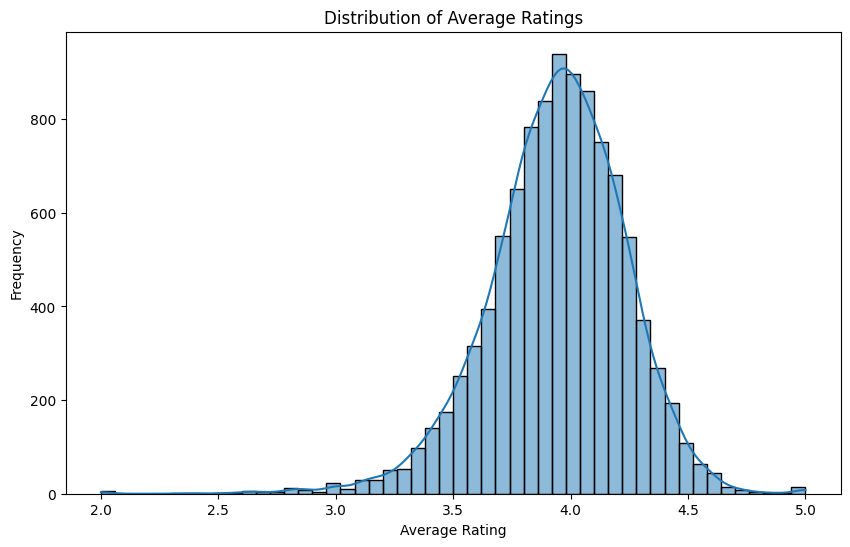

In [15]:
# plot for average_rating
plt.figure(figsize=(10, 6))
sns.histplot(books_df['average_rating'], bins=50, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

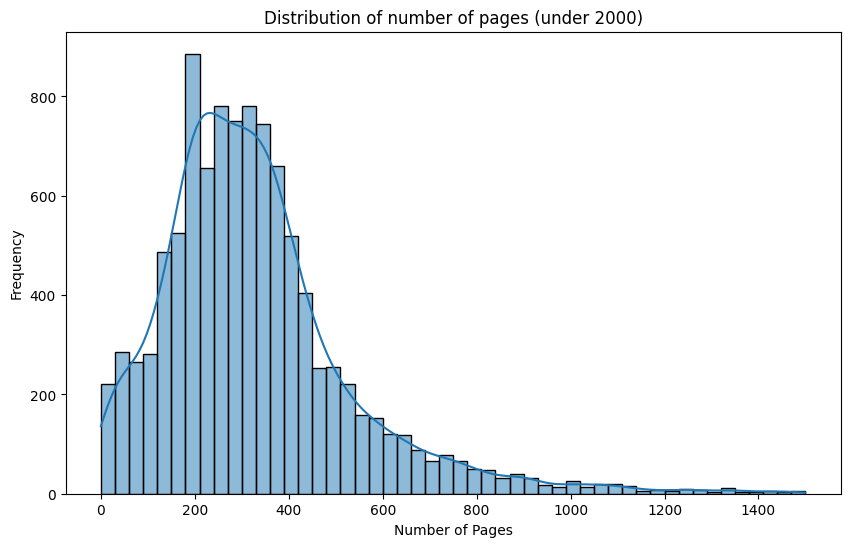

In [16]:
# remove books with over 2000 pages for better visualization
books_df_filtered = books_df[books_df['num_pages'] <= 2000]

plt.figure(figsize=(10, 6))
sns.histplot(books_df_filtered['num_pages'], bins=50, kde=True)
plt.title('Distribution of number of pages (under 2000)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')

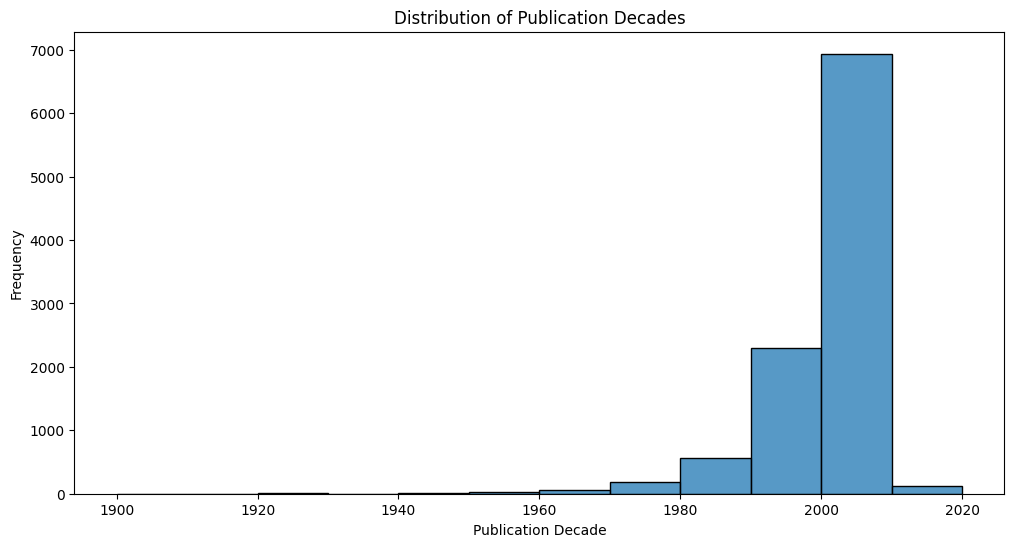

In [36]:
pud_date_df = books_df.copy()
pud_date_df['publication_date'] = pd.to_datetime(pud_date_df['publication_date'], format='%m/%d/%Y', errors='coerce')

# Extract year
pud_date_df['year'] = pud_date_df['publication_date'].dt.year

# Drop rows with non-finite 'year' values
pud_date_df = pud_date_df.dropna(subset=['year'])

# Convert 'year' to integer using .loc
pud_date_df.loc[:, 'year'] = pud_date_df['year'].astype(int)

# bin books by decade
pud_date_df['decade'] = (pud_date_df['year'] // 10) * 10
# visualize publication decade distribution
plt.figure(figsize=(12, 6))
sns.histplot(pud_date_df['decade'], bins=range(1900, 2030, 10), kde=False)
plt.title('Distribution of Publication Decades')
plt.xlabel('Publication Decade')
plt.ylabel('Frequency')
plt.show()

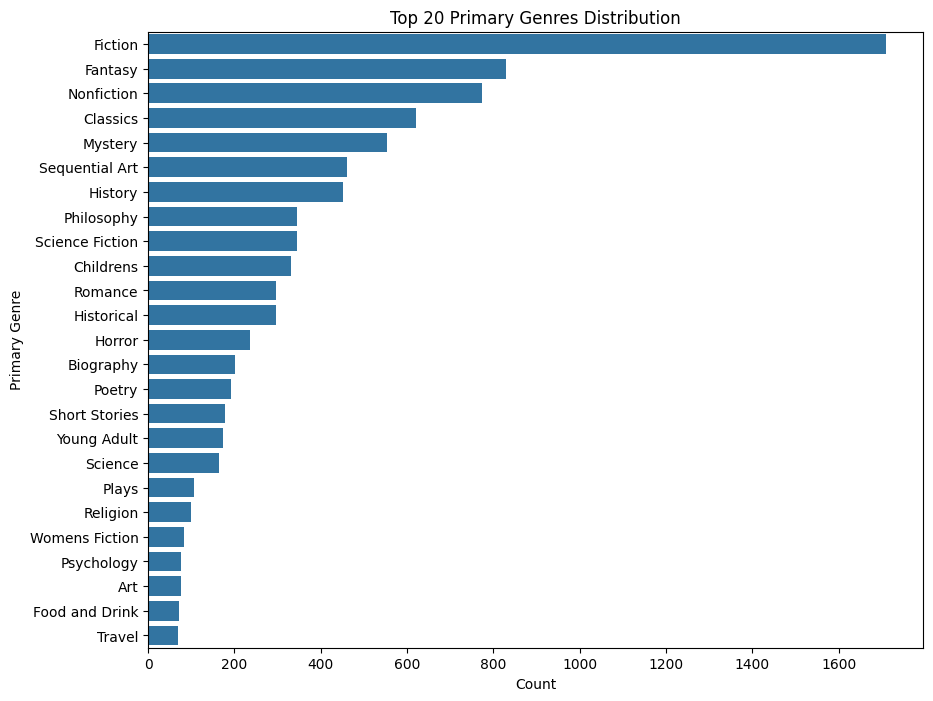

In [37]:
# graph primary genre distribution of top 20 genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres_df['genre_1'], order=genres_df['genre_1'].value_counts().index[:25])
plt.title('Top 20 Primary Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()

In [38]:
# total genre distribution
genre1_counts = genres_df['genre_1'].value_counts()
genre2_counts = genres_df['genre_2'].value_counts()
genre3_counts = genres_df['genre_3'].value_counts()
genre4_counts = genres_df['genre_4'].value_counts()
# Combine counts so a genre that appears as either first or second is counted together
combined = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0).add(genre4_counts, fill_value=0).sort_values(ascending=False)

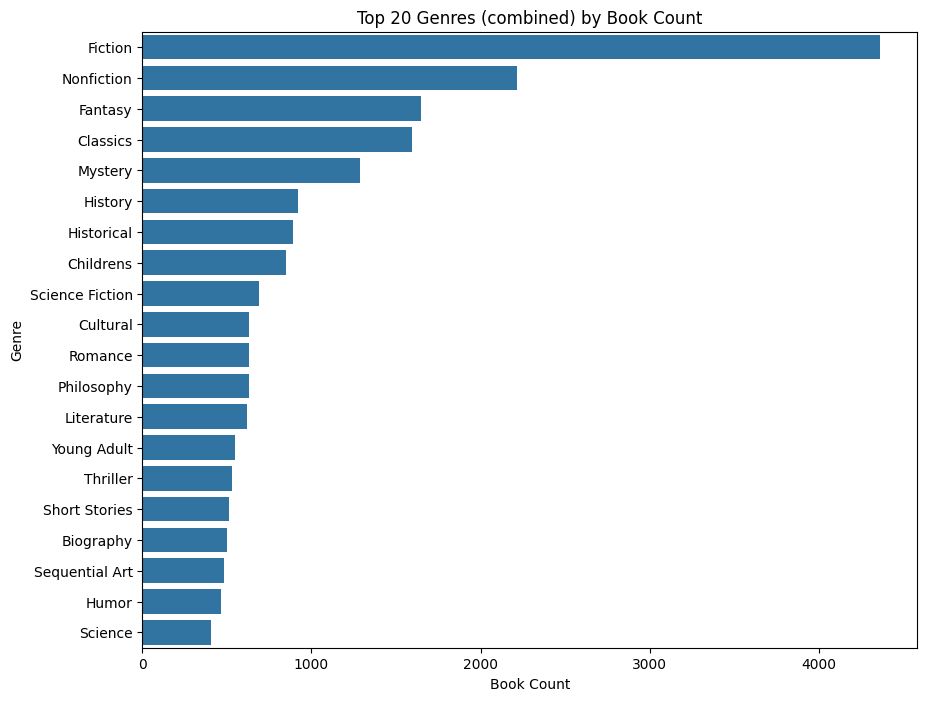

In [40]:
# graph top 20 genres
plt.figure(figsize=(10, 8))
sns.barplot(y=combined.index[:20], x=combined.values[:20])
plt.title('Top 20 Genres (combined) by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Genre')
plt.show()

In [48]:
# Save top 20 genres to d dataframe
top_20_genres = combined.head(20)

avg_rating_genre = {}
avg_pages_genre = {}
ratings_count_by_genre = {}
for genre in top_20_genres.index:
    # find average rating by genre (combined)
    genre_books = genres_df[
        (genres_df['genre_1'] == genre) |
        (genres_df['genre_2'] == genre) |
        (genres_df['genre_3'] == genre) |
        (genres_df['genre_4'] == genre)
    ]
    avg_rating_genre[genre] = genre_books['average_rating'].mean()
    avg_pages_genre[genre] = genre_books['num_pages'].mean()
    ratings_count_by_genre[genre] = genre_books['ratings_count'].count()
avg_rating_genre_df = pd.DataFrame.from_dict(avg_rating_genre, orient='index', columns=['average_rating'])
avg_pages_genre_df = pd.DataFrame.from_dict(avg_pages_genre, orient='index', columns=['average_num_pages'])
ratings_count_by_genre_df = pd.DataFrame.from_dict(ratings_count_by_genre, orient='index', columns=['ratings_count'])

avg_genre_stats = pd.concat([avg_rating_genre_df, avg_pages_genre_df, ratings_count_by_genre_df], axis=1)
avg_genre_stats = avg_genre_stats.sort_values(by='average_rating', ascending=False)
avg_genre_stats



,average_rating,average_num_pages,ratings_count
Sequential Art,4.126619,197.482474,485
Science,4.022095,364.885714,315
Biography,4.015288,396.300412,486
Childrens,4.006342,141.455752,678
Classics,3.991162,353.782663,1592
Nonfiction,3.988381,342.678845,2217
Philosophy,3.985758,326.789562,594
History,3.979863,399.492009,876
Fantasy,3.967439,361.041451,1351
Short Stories,3.958235,327.249020,510


In [52]:
# How many different authors? 
print(f"Number of unique authors: {books_df['Author'].nunique()}")
# how many different publishers?
print(f"Number of unique publishers: {books_df['publisher'].nunique()}")

Number of unique authors: 6204
Number of unique publishers: 2147


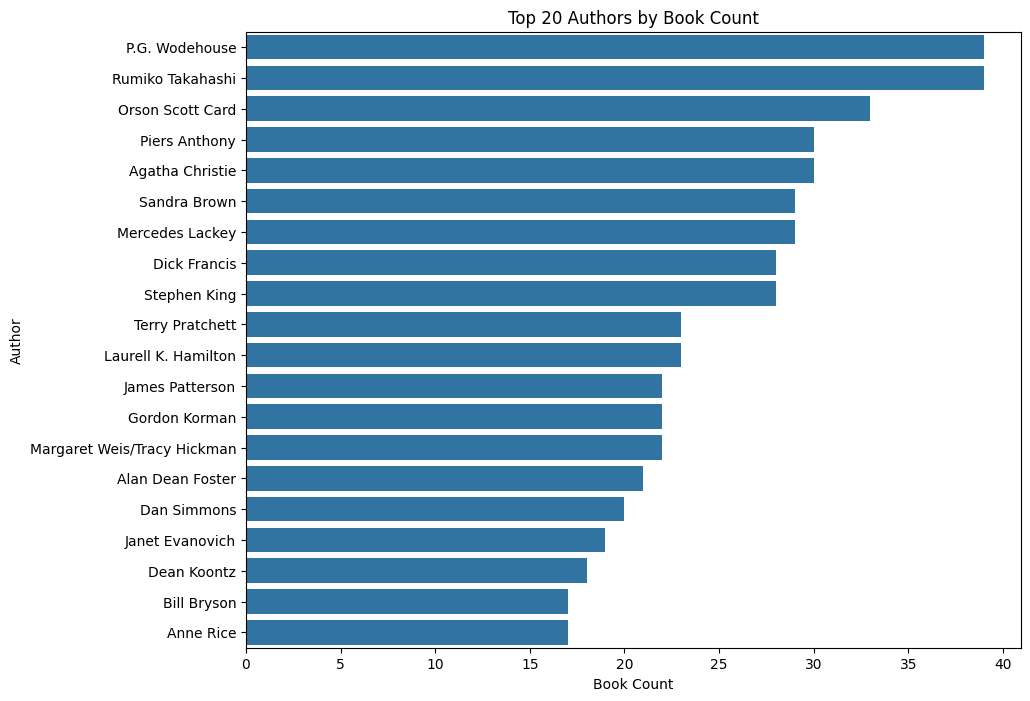

In [59]:
# analyze top 20 authors by book count
top_authors = books_df['Author'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 20 Authors by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Author')
plt.show()

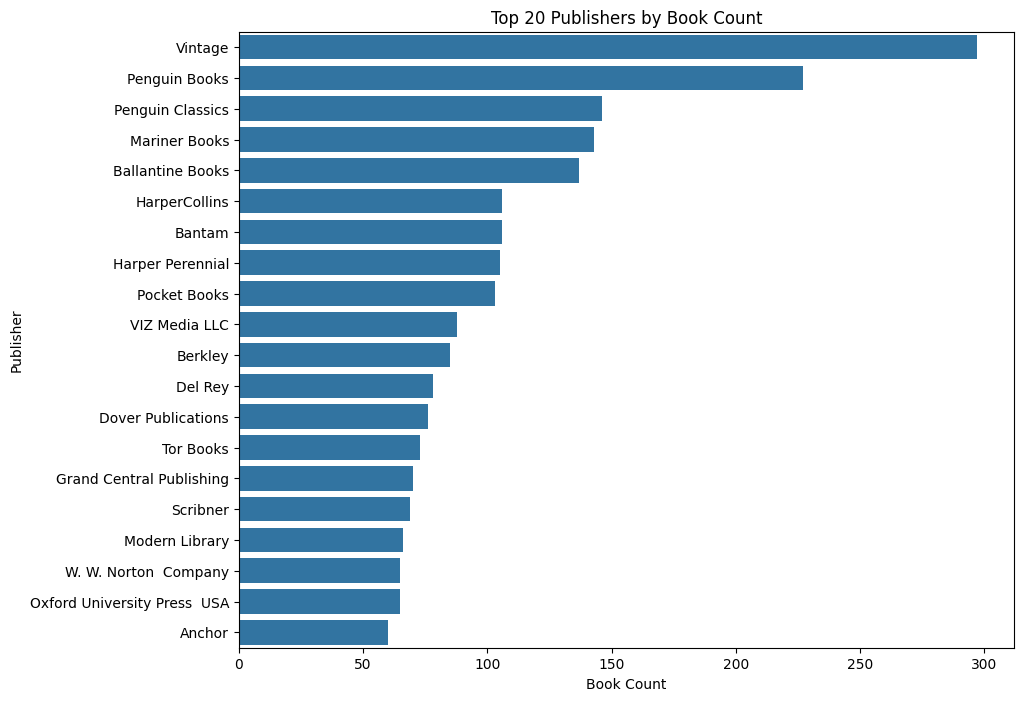

In [53]:
# analyze top 20 publishers by book count
top_publishers = books_df['publisher'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title('Top 20 Publishers by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Publisher')
plt.show()

In [55]:
# how many books per publisher? Top genres for each publisher?
publisher_genre_stats = {}
for publisher in top_publishers.index:
    publisher_books = genres_df[genres_df['publisher'] == publisher]
    genre_counts = {}
    for genre in top_20_genres.index:
        genre_count = publisher_books[
            (publisher_books['genre_1'] == genre)
        ].shape[0]
        genre_counts[genre] = genre_count
    publisher_genre_stats[publisher] = genre_counts
publisher_genre_df = pd.DataFrame.from_dict(publisher_genre_stats, orient='index')
publisher_genre_df = publisher_genre_df.fillna(0).astype(int)
publisher_genre_df.head()

,Fiction,Nonfiction,Fantasy,Classics,Mystery,History,Historical,Childrens,Science Fiction,Cultural,Romance,Philosophy,Literature,Young Adult,Thriller,Short Stories,Biography,Sequential Art,Humor,Science
Vintage,136,22,0,6,7,22,9,0,2,8,0,8,0,0,0,27,8,0,1,3
Penguin Books,68,19,5,33,4,20,6,0,2,2,0,12,0,0,0,9,6,1,1,3
Penguin Classics,29,3,3,59,0,7,4,0,0,3,0,17,0,0,0,5,0,0,0,1
Mariner Books,45,26,1,3,9,7,3,0,3,0,0,0,0,0,0,9,8,0,0,3
Ballantine Books,52,11,5,1,6,5,11,0,7,0,4,1,0,0,0,0,1,1,0,3


##### What is the ideal book length of each genre?

Empty DataFrame
Columns: [n_books, mean_pages, median_pages, std_pages, mean_rating, median_rating]
Index: []


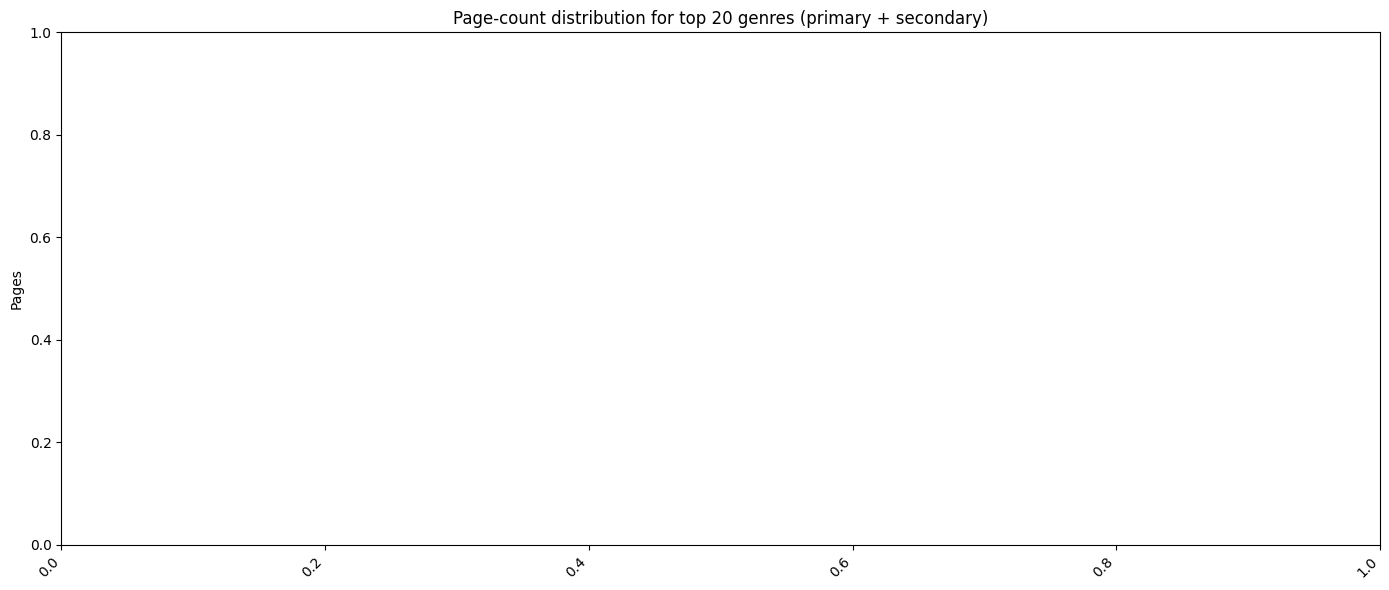

KeyError: 'total_books_genre'

In [ ]:
# build list of genres from primary and secondary, exclude Unknown / null
def genres_list(row):
    gs = []
    for g in [row.get('genre_1'), row.get('genre_2')]:
        if pd.notna(g) and str(g).strip() and str(g).strip().lower() != 'unknown':
            gs.append(str(g).strip())
    return list(dict.fromkeys(gs))  # preserve order, dedupe

df['genres_list'] = df.apply(genres_list, axis=1)

# explode so each book appears once per valid genre (counts toward both primary & secondary)
df_expl = df.explode('genres_list').dropna(subset=['genres_list']).rename(columns={'genres_list':'genre'})

# choose top N primary genres by count
top_n = 20
top_genres = df_expl['genre'].value_counts().head(top_n).index.tolist()
df_top = df_expl[df_expl['genre'].isin(top_genres)].copy()

# per-genre summary
summary = df_top.groupby('genre').agg(
    n_books=('Title','count'),
    mean_pages=('num_pages','mean'),
    median_pages=('num_pages','median'),
    std_pages=('num_pages','std'),
    mean_rating=('average_rating','mean'),
    median_rating=('average_rating','median')
).sort_values('n_books', ascending=False)
print(summary)

# boxplot of distributions for top genres
plt.figure(figsize=(14,6))
order = summary.index.tolist()
sns.boxplot(data=df_top, x='genre', y='num_pages', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pages')
plt.title(f'Page-count distribution for top {top_n} genres (primary + secondary)')
plt.tight_layout()
plt.show()

# heuristic: find best binned page range per genre using ratings_count-weighted mean rating
bins = np.linspace(20, 2000, 20)  # adjustable
results = []
min_support = 5

for g in top_genres:
    sub = df_expl[df_expl['genre'] == g].copy()
    if len(sub) < min_support:
        continue
    sub['page_bin'] = pd.cut(sub['num_pages'], bins)
    def weighted_rating(group):
        total_weights = group['ratings_count'].sum()
        if total_weights > 0:
            return (group['average_rating'] * group['ratings_count']).sum() / total_weights
        return group['average_rating'].mean()
    grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
        'weighted_mean_rating': weighted_rating(gg),
        'count': len(gg)
    })).reset_index()
    grouped = grouped[grouped['count'] >= min_support]
    if grouped.empty:
        continue
    best = grouped.loc[grouped['weighted_mean_rating'].idxmax()]
    left = int(best['page_bin'].left)
    right = int(best['page_bin'].right)
    results.append({
        'genre': g,
        'ideal_page_range': f'{left}-{right}',
        'mean_rating_in_range': float(best['weighted_mean_rating']),
        'books_in_range': int(best['count']),
        'total_books_genre': int(len(sub))
    })

ideal_df = pd.DataFrame(results).sort_values('total_books_genre', ascending=False)
print("\nSuggested ideal page ranges (primary + secondary):")
print(ideal_df)

## Book Recommendation System